# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Read the dataset given in file named 'bigcity.csv'.

In [160]:
import pandas as pd
data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [161]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [162]:
data.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# Q1. Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [163]:
data.isna().head()

,u,x
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [164]:
data.info()# the .info() fun also gives weather the data has null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
u    49 non-null int64
x    49 non-null int64
dtypes: int64(2)
memory usage: 864.0 bytes


In [165]:
data.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# Q2. Transform the dataset and Split data into train, test sets 

Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Hint: You can shape function to get the size of the dataframe

Hint: You can use df.loc or df.iloc to separate input and target and store into X and Y

Hint: You can use train_test_split function to split data to X_train, X_test, y_train, y_test 

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [167]:
X=data[['u']]
y=data[['x']]

In [168]:
X.shape

(49, 1)

In [169]:
y.shape

(49, 1)

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [171]:
model1=LinearRegression()

In [172]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
predclass=model1.predict(X_train)
mse=metrics.mean_squared_error(predclass,y_train)
trainRMSE=np.sqrt(mse)
print("train RMSE is",trainRMSE)
predtest=model1.predict(X_test)
test_mse=metrics.mean_squared_error(predtest,y_test)
testRMSE=np.sqrt(test_mse)
print("test RMSE is",testRMSE)

train RMSE is 25.479185580466712
test RMSE is 16.97654458080141


# Q3. Fit Linear Regression Model and find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Hint: coef_ and intercept_ functions can help you get coefficients & intercept

In [174]:
c=model1.intercept_
m=model1.coef_

In [175]:
print("b0 value is",c)
print("b1 value is",m)

b0 value is [9.85762879]
b1 value is [[1.15435885]]


# Q4. Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

Hint - use matplotlib plt.plot() function to plot the line

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
y=m*X_train+c

In [178]:
y.head()

,u
5,52.568906
47,195.709404
34,148.380691
37,62.958136
26,56.031983


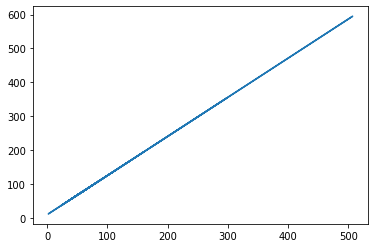

In [39]:
plt.plot(X_train,y)

In [156]:
data.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


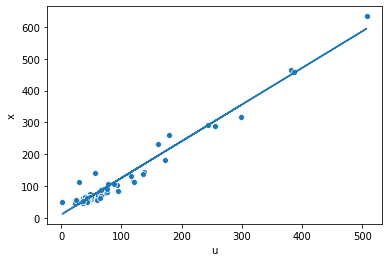

In [181]:
sns.scatterplot(x='u',y='x',data=data)
plt.plot(X_train,y)
plt.show()

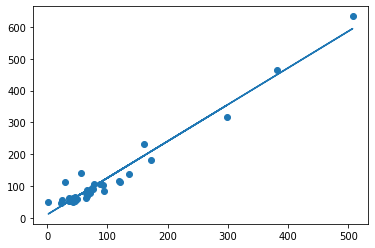

In [180]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y)
plt.show()

# Q5. Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [ ]:
y_pred = lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse =__649________________________

rmse = sqrt(mse)16.97

r2Score = ____________88%____________

print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [49]:
mse=metrics.mean_squared_error(predclass,y_train)
print("train mse is",mse)
trainRMSE=np.sqrt(mse)
print("train RMSE is",trainRMSE)
predtest=model1.predict(X_test)
test_mse=metrics.mean_squared_error(predtest,y_test)
testRMSE=np.sqrt(test_mse)
print("test RMSE is",testRMSE)

train mse is 649.1888978438628
train RMSE is 25.479185580466712
test RMSE is 16.97654458080141


In [53]:
r2_score(X_train,y_train)

0.8579801884216098

In [59]:
r2score=r2_score(X_test,y_test)
print("r2 score of test data",r2score)

r2 score of test data 0.8872489227111319


In [58]:
print("The Root Mean Sq Error is {} and R^2 error is {}".format(testRMSE,r2Score))

NameError: name 'r2Score' is not defined

### Calculate the accuracy of the model for both training and test data set 

Hint: .score() function 

In [60]:
model1.score(X_train,y_train)

0.956427899949522

In [61]:
model1.score(X_test,y_test)

0.9800533965222666

# Decision Trees and Ensembles

#### Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [142]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame and Print 10 samples from the dataset


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [100]:
pima_df=pd.read_csv("diabetes.csv")

In [101]:
pima_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [90]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Q2. Print the datatypes of each column and the shape of the dataset 

In [92]:
pima_df.shape

(768, 9)

In [93]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q3. Replace all the 0s in the column with the median of the same column value accordingly.

In [104]:
for i in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]:
    #mean=pima_df[i].mean()
    pima_df.loc[pima_df[i]==0,i] = pima_df[i].median()

In [105]:
pima_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50.0,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31.0,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32.0,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30.0,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29.0,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54.0,1


# Q4. Print the descriptive statistics of each & every column using describe() function

In [71]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q5. See the distribution of 'Outcome' variable and countplot using seaborn

In [113]:
pima_df["Outcome"]=pima_df["Outcome"].astype("category")

In [114]:
pima_df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                     category
dtype: object

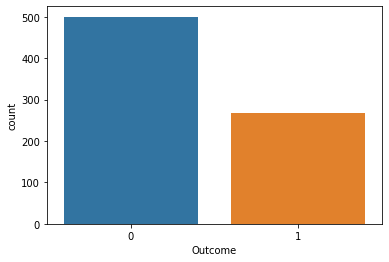

In [116]:
sns.countplot(x="Outcome",data=pima_df)

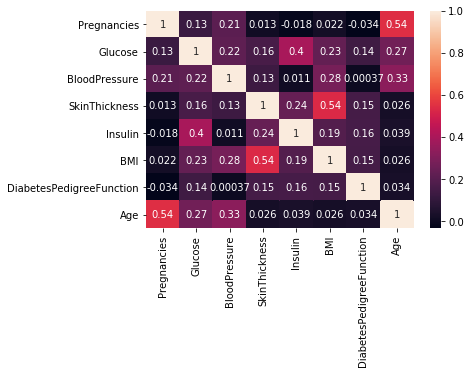

In [121]:
sns.heatmap(pima_df.corr(),annot=True)

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


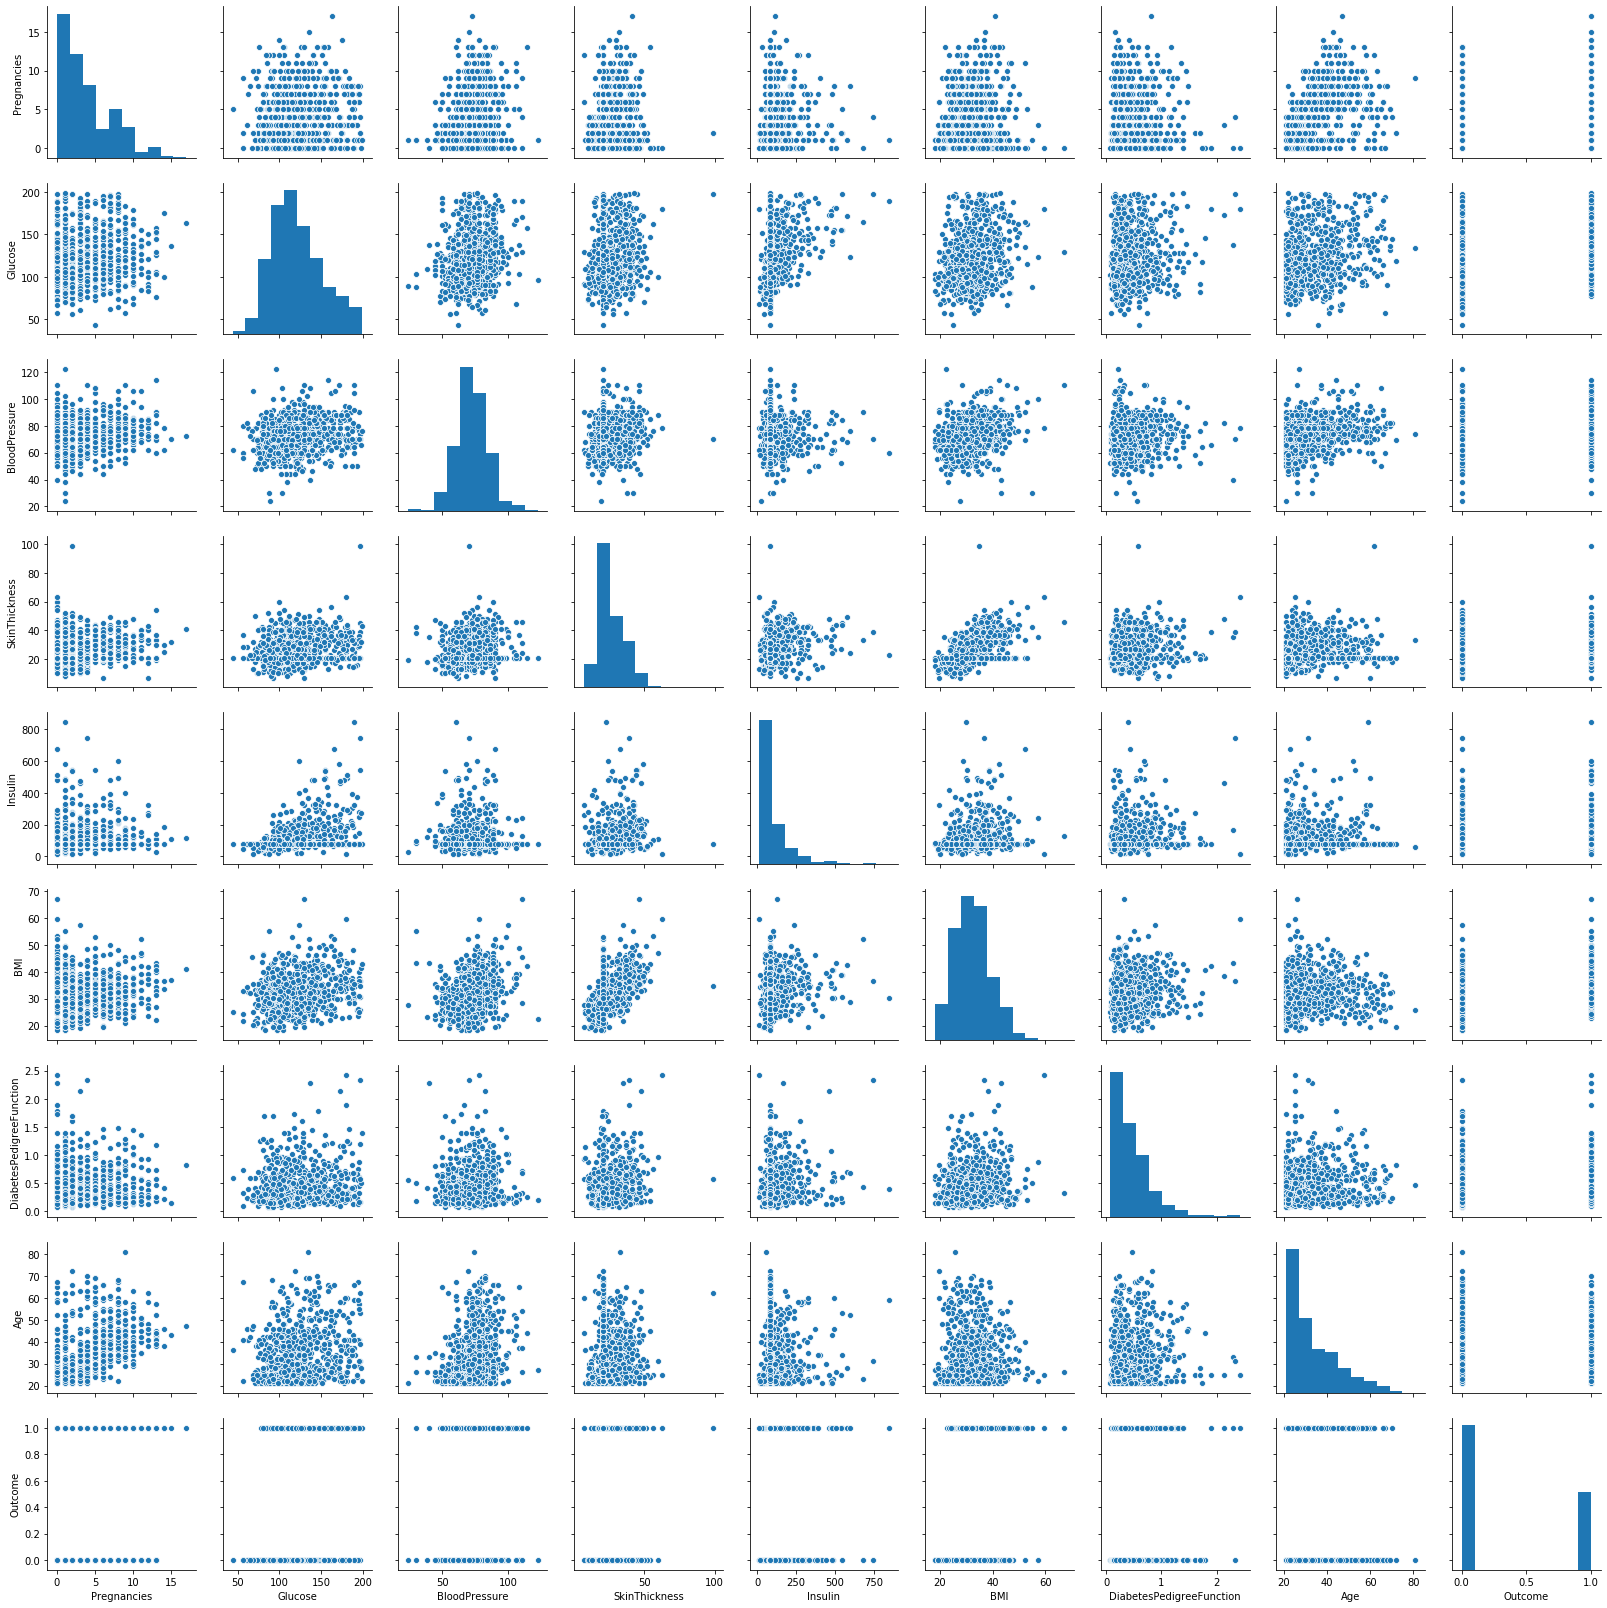

In [119]:
sns.pairplot(pima_df)

Using the plot - infer the relationship between different variables

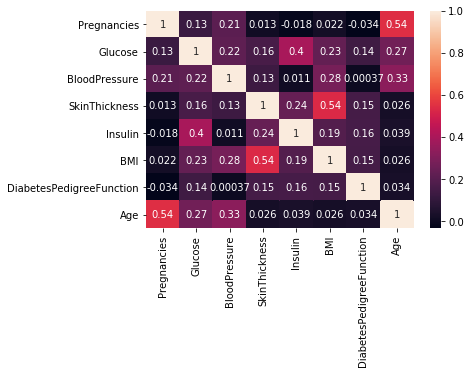

In [122]:
sns.heatmap(pima_df.corr(),annot=True)

(glucose , insullin)(age,pregnencies)(BMI,skin thickness),(age,bloodpressure)have highly correlated.... 

# Q7. Divide the data into feature(X) and target(Y) sets and split the pima_df into training and test set in the ratio of 70:30 (Training:Test).


In [128]:
X_feature=pima_df.drop('Outcome',axis=1)
y_target=pima_df[['Outcome']]
print(X_feature.head(5))
print(y_target.head(5))
X_train,X_test,y_train,y_test=train_test_split(X_feature,y_target,test_size=0.3,random_state=3)

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     2.288  33.0  
  Outcome
0       1
1       0
2       1
3       0
4       1


# Q8. Create the decision tree model using “entropy” as the cost and fit it to training data.</b>



In [136]:
modelDT=DecisionTreeClassifier(criterion="entropy")
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q9. Print the accuracy of the model & print the confusion matrix 

In [138]:
y_predict=modelDT.predict(X_test)
print(modelDT.score(X_train,y_train))
print(modelDT.score(X_test,y_test))

1.0
0.7012987012987013


Print the feature importance of the decision model - Optional

In [139]:
print(metrics.confusion_matrix(y_test,y_predict))

[[100  33]
 [ 36  62]]


# Q10. Apply the Random forest model and print the accuracy of Random forest Model

In [143]:
modelRF=RandomForestClassifier()

In [146]:
modelRF.fit(X_train,y_train)

C:\Users\darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_pred=modelRF.predict(X_test)
print("score of train data is\t",modelRF.score(X_train,y_train))
print("score of test data is \t",modelRF.score(X_test,y_test))
print("\n confusion matrix is\n",metrics.confusion_matrix(y_test,y_pred))

score of train data is	 0.9851024208566108
score of test data is 	 0.7316017316017316

 confusion matrix is
 [[114  19]
 [ 43  55]]


# -------------------------------------------------------------------
# Next steps are optional and will not be graded.
# -------------------------------------------------------------------

# Q11. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

# Q12. Apply Bagging Classifier Algorithm and print the accuracy.

# Q13. - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

# Q14. Apply Voting Classfier on the given dataset 

# Q15. State your insights.